In [60]:
import warnings
warnings.filterwarnings('ignore')

### 문제정의
- 손 글씨 숫자(0~9)를 분류하는 모델을 만들어보자
- 이밎 데이터의 형태를 이해해보자.

### 데이터 수집

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/digit_train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 데이터 시각화
img0 = data.iloc[0, 1:]

In [9]:
# 리스트 자료형을 28 * 28의 2차원으로 변환
img0_reshape = img0.values.reshape(28,28)

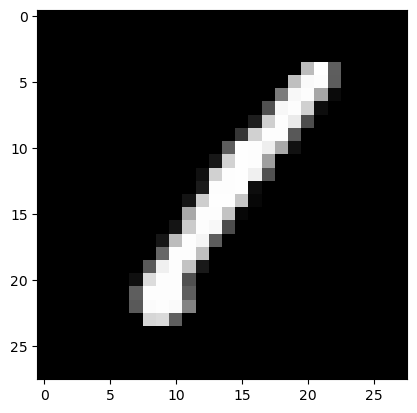

In [28]:
plt.imshow(img0_reshape, cmap='gray')
plt.show()

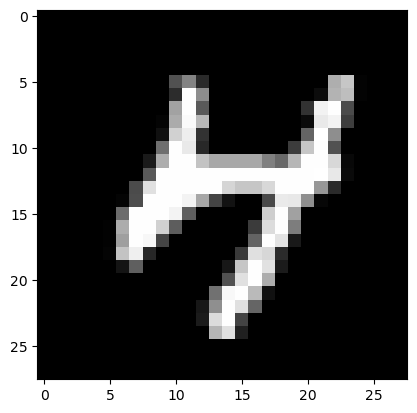

In [30]:
# 33번 행의 데이터 가져와서 이미지 그려보기
img33 = data.iloc[32,1:]
img33_reshape = img33.values.reshape(28,28)
plt.imshow(img33_reshape, cmap='gray')

### 학습을 위한 데이터 분리
- 학습 7 : 테스트 3
- random_state = 3

In [33]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# 1. X(문제), y(정답) 분리
X = data.loc[:,'pixel0':]
y = data['label']
# 2. X, y ==> 7 : 3 ==> 학습용과 테스트용으로 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3, test_size=0.3)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


### 모델 적용
- KNN
- LogisticRegression
- SVM

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

knn_model = KNeighborsClassifier()
lg_model = LogisticRegression()
svm_model = LinearSVC()

### 학습 및 평가

In [48]:
# 학습
knn_model.fit(X_train,y_train)
lg_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [51]:
# 평가 : score
print('KNN : ',knn_model.score(X_test,y_test))
print('LG : ',lg_model.score(X_test,y_test))
print('SVM : ',svm_model.score(X_test,y_test))

KNN :  0.9638888888888889
LG :  0.9113492063492064
SVM :  0.8642857142857143


### 데이터 스케일링
- 이미지 데이터 : 픽셀정보(0 ~ 255)
- MinMaxScaler를 사용하여 0 ~ 1 사이의 값으로 모든 픽셀을 조정
- 스케일링의 효과 확인하기
    - 학습(연산) 속도가 개선(빨라짐)
    - 거리기반으로 예측하는 KNN모델은 거의 변화가 없었음
-

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 학습
scaler.fit(X_train)

MinMaxScaler()

In [55]:
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [57]:
# 스케일링 후 재 학습
knn_model.fit(X_train_scale,y_train)
lg_model.fit(X_train_scale,y_train)
svm_model.fit(X_train_scale,y_train)

C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gjaischool1\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [59]:
# 평가 : score
print('KNN : ',knn_model.score(X_test_scale,y_test))
print('LG : ',lg_model.score(X_test_scale,y_test))
print('SVM : ',svm_model.score(X_test_scale,y_test))

KNN :  0.9639682539682539
LG :  0.9165079365079365
SVM :  0.9080952380952381


### 분류평가지표
- 회귀 : 오차를 기반으로하는 MSE, R2score
- 분류 : 맞춘 개수를 기반으로 평가지표 적용
    1. 정확도(Accuracy) : 전체 데이터에서 정확히 맞춘 비율
    2. 재현율(Recall) : 실제 양성중에서 정확히 맞춘 비율
    3. 정밀도(Precision) : 모델이 예측한 양성중에서 정확히 맞춘 비율
    4. F1-score : 재현율과 정밀도의 조화평균
- SVM : 초평면(결정경계)을 기준으로 소프트벡터(가장 가까운 데이터)의 마진(초평면과의 거리)

In [68]:
from sklearn.metrics import classification_report

In [63]:
pre = lg_model.predict(X_test_scale)

In [69]:
# confusion_matrix(실제정답, 예측한 값)
print(classification_report(y_test, pre))

# support : 데이터 갯수
# accuracy : 현재 내 모델이 92%의 정확도로 예측하고 있지만, 각 숫자(0 ~ 9)가 나올 확률은 모두 다름
# f1-score : 정밀도와 재현율을 고려한 수치(조화평균)로
#            f1-score가 높다면 두 분류지표(정밀도, 재현율)도 높다.
# macro avg : 재현율, 정밀도, f1-score를 구해서 각각 평균을 낸 것
#             현재 모델을 사용해서 분류할때 각 클래스(숫자)에 대해 얼마나 평균적으로 잘 동작하는지

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1214
           1       0.95      0.97      0.96      1362
           2       0.91      0.89      0.90      1213
           3       0.90      0.90      0.90      1287
           4       0.93      0.92      0.93      1276
           5       0.88      0.86      0.87      1168
           6       0.93      0.95      0.94      1227
           7       0.92      0.93      0.92      1313
           8       0.90      0.86      0.88      1250
           9       0.90      0.90      0.90      1290

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



### 예측하기

In [79]:
img10 = X_test_scale[20]

In [80]:
lg_model.predict([img10])

array([1], dtype=int64)

In [81]:
svm_model.predict([img10])

array([1], dtype=int64)

In [82]:
# 실제 정답 확인
y_test.iloc[20]

1

In [83]:
lg_model.predict_proba(X_test_scale[20:21])

array([[3.30584700e-11, 9.93596709e-01, 9.35889522e-06, 4.36457078e-03,
        4.97592907e-07, 5.53871547e-05, 3.80057866e-07, 3.54693245e-04,
        2.10842409e-04, 1.40756049e-03]])